# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')

headers = table.find_all('th')
rows = table.find_all('tr')
print(headers)
print(rows)

[<th>id</th>, <th>terrestrial_date</th>, <th>sol</th>, <th>ls</th>, <th>month</th>, <th>min_temp</th>, <th>pressure</th>]
[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</t

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
#Code utilized from this Youtube video https://www.youtube.com/watch?v=aGCyqj8nPKw

# Create an empty list
mars_column_titles = []
# Loop through the scraped data to create a list of rows
for header in headers:
    title = header.text
    mars_column_titles.append(title)
print(mars_column_titles)
   

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [7]:
df = pd.DataFrame(columns=mars_column_titles)
print(df)

Empty DataFrame
Columns: [id, terrestrial_date, sol, ls, month, min_temp, pressure]
Index: []


In [8]:
#Code utilized from this Youtube video https://www.youtube.com/watch?v=aGCyqj8nPKw
#Add row level data to previously created DataFrame w/ column headers
for row in rows[1:]:
    data = row.find_all('td')
    row = [tr.text for tr in data]
    l = len(df)
    df.loc[l] = row




In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
df.dtypes
# Display data types in dataframe
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
mars_df = df.astype({'terrestrial_date': 'datetime64', 'sol': 'int64', 'ls': 'int64', 'month': 'int64',
                     'min_temp': 'float64', 'pressure': 'float64'})

In [14]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
mars_df['month'].value_counts()

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

In [16]:
# 2. How many Martian days' worth of data are there?
days_count = mars_df['id'].count()
days_count

1867

In [17]:
# 3. What is the average low temperature by month?
avg_month_low_df = mars_df[['month', 'min_temp']]
new_month_df = avg_month_low_df.groupby(['month']).mean()
new_month_df



,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0, 0.5, 'Temperature in Celsius')

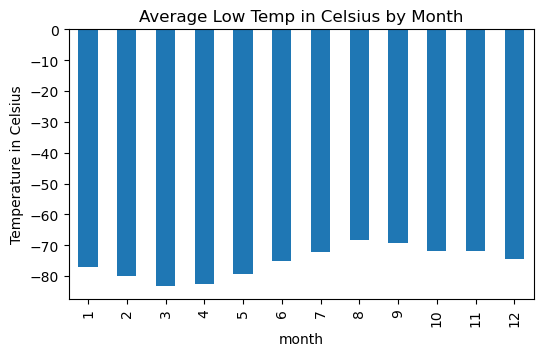

In [18]:
# Plot the average temperature by month
new_month_df.plot(kind='bar', figsize=(6,3.5), legend=False)
# Set title for chart
plt.title("Average Low Temp in Celsius by Month")
plt.ylabel("Temperature in Celsius")


Text(0, 0.5, 'Temperature in Celsius')

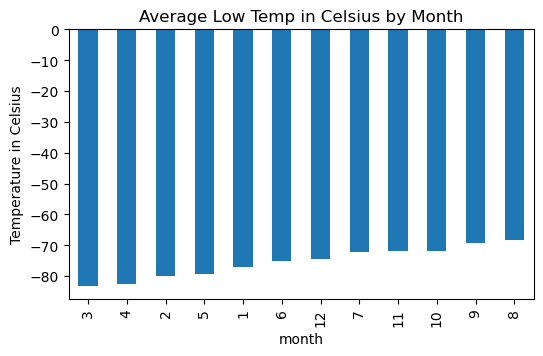

In [19]:
# Identify the coldest and hottest months in Curiosity's location
sorted = new_month_df.sort_values(by='min_temp', ascending=True)
# Plot the average temperature by month
sorted.plot(kind='bar', figsize=(6,3.5), legend=False)
# Set title for chart
plt.title("Average Low Temp in Celsius by Month")
plt.ylabel("Temperature in Celsius")



In [20]:
# 4. Average pressure by Martian month
avg_pressure_df = mars_df[['month', 'pressure']]
new_pressure_df = avg_pressure_df.groupby(['month']).mean()
sorted_pressure =new_pressure_df.sort_values(by='pressure')
sorted_pressure

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


Text(0, 0.5, 'Atmospheric Pressure')

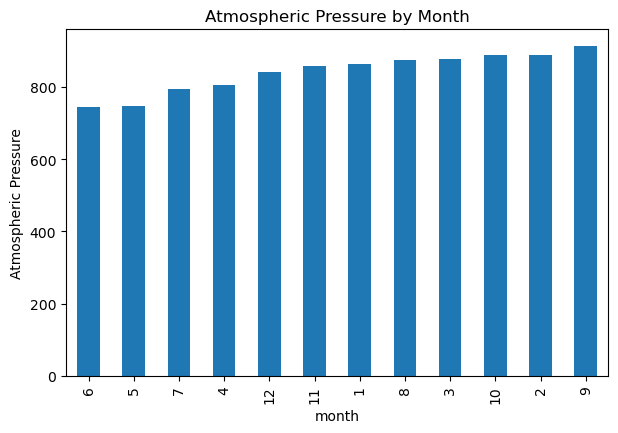

In [21]:
# Plot the average pressure by month
sorted_pressure.plot(kind='bar', figsize=(7,4.5), legend=False)
# Display Plot Title
plt.title("Atmospheric Pressure by Month")
# Display ylabel title
plt.ylabel("Atmospheric Pressure")


Text(0.5, 0, 'Number of Terrestrial Days')

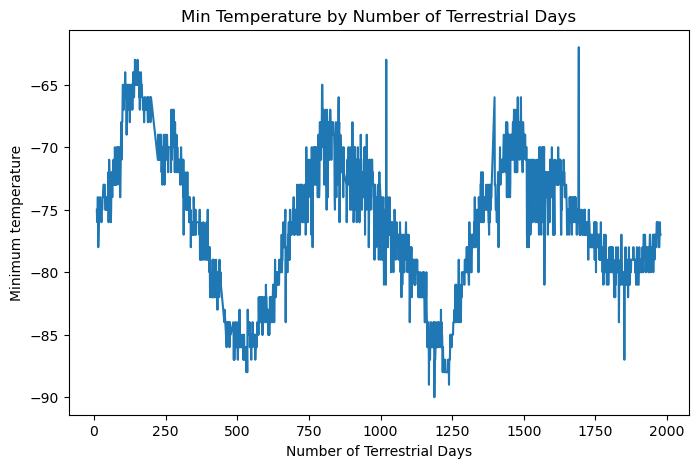

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
    # Answer: After plotting the graph, it looks like ~700 days are in a year given the length of days between minimum low temps
martian_days_df = mars_df[['sol', 'min_temp']]

martian_days_df.plot(kind='line', x='sol', y='min_temp', figsize=(8,5), legend=False)
# Display Plot Title
plt.title("Min Temperature by Number of Terrestrial Days")
# Display ylabel title
plt.ylabel("Minimum temperature")
plt.xlabel('Number of Terrestrial Days')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_df.to_csv("Output/dataframe.csv", index=False, header=True)

In [25]:
browser.quit()